In [1]:
import pandas as pd

In [2]:
# read pickle file

# transactions = pd.read_pickle('transactions_cleaned.pkl')
customers = pd.read_pickle('customers_cleaned.pkl')

In [3]:
customers.head()
print(customers.shape)

(1371980, 25)


In [4]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bin,age_group,Overall_transaction_count,...,Graphic_bought_most,Perceived_color_bought_most,Section_bought_most,Earliest_transaction_date,Recency,Tenure,Transaction_count_revised,Recency_days,Tenure_days,Unique_items
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,45-54,Adult,21.0,...,Solid,Dark,Womens Tailoring,2018-12-27,17 days,618 days,19.0,17.0,618.0,19.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,25-34,Adult,86.0,...,Solid,Dark,"Womens Swimwear, beachwear",2018-09-21,76 days,656 days,64.0,76.0,656.0,64.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,25-34,Young,18.0,...,Solid,Dark,Men Suits & Tailoring,2018-09-20,7 days,726 days,14.0,7.0,726.0,14.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,55-64,Senior,2.0,...,Solid,Dark,Ladies H&M Sport,2019-06-09,471 days,0 days,2.0,471.0,0.0,2.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,45-54,Senior,13.0,...,Solid,Dark,Womens Lingerie,2018-10-12,41 days,670 days,12.0,41.0,670.0,12.0


In [5]:
# print list of columns
print(customers.columns)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'age_bin', 'age_group',
       'Overall_transaction_count', 'Overall_transaction_count_channel_1',
       'Overall_transaction_count_channel_2', 'Last_transaction_date',
       'Overall_transacted', 'Product_type_bought_most', 'Graphic_bought_most',
       'Perceived_color_bought_most', 'Section_bought_most',
       'Earliest_transaction_date', 'Recency', 'Tenure',
       'Transaction_count_revised', 'Recency_days', 'Tenure_days',
       'Unique_items'],
      dtype='object')


In [6]:
# run hierarchical clustering

from sklearn.cluster import AgglomerativeClustering

In [7]:
# check overall transacted, if NAN then replace with 0
customers['Overall_transacted'] = customers['Overall_transacted'].fillna(0)
customers['Recency_days'] = customers['Recency_days'].fillna(0)
customers['Tenure_days'] = customers['Tenure_days'].fillna(0)

In [8]:
# Exclude the 'customer_id' column from clustering
# columns_to_cluster = ['Recency_days', 'Tenure_days', 'Overall_transacted']
# columns_to_cluster = ['Active', 'age', 'fashion_news_frequency']

# Select the relevant columns from the dataset
# data = customers[columns_to_cluster]

data = customers.copy()
data.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bin,age_group,Overall_transaction_count,...,Graphic_bought_most,Perceived_color_bought_most,Section_bought_most,Earliest_transaction_date,Recency,Tenure,Transaction_count_revised,Recency_days,Tenure_days,Unique_items
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,45-54,Adult,21.0,...,Solid,Dark,Womens Tailoring,2018-12-27,17 days,618 days,19.0,17.0,618.0,19.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,25-34,Adult,86.0,...,Solid,Dark,"Womens Swimwear, beachwear",2018-09-21,76 days,656 days,64.0,76.0,656.0,64.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,25-34,Young,18.0,...,Solid,Dark,Men Suits & Tailoring,2018-09-20,7 days,726 days,14.0,7.0,726.0,14.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,55-64,Senior,2.0,...,Solid,Dark,Ladies H&M Sport,2019-06-09,471 days,0 days,2.0,471.0,0.0,2.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,45-54,Senior,13.0,...,Solid,Dark,Womens Lingerie,2018-10-12,41 days,670 days,12.0,41.0,670.0,12.0


In [9]:
data_cluster = data[(data['age'] >= 35) & (data['age'] <= 44) & (data['Active'] == 1.0) & (data['fashion_news_frequency'] == 'Regularly')]
data_cluster.head()
data_cluster.describe

<bound method NDFrame.describe of                                                customer_id   FN  Active  \
19       0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  1.0     1.0   
25       000114c6996ef5703a8d455faf2103f8488d3928348e07...  1.0     1.0   
38       0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...  1.0     1.0   
123      00053f544468004bd5b18b25ae8faad7c9a2f71c34e7cd...  1.0     1.0   
236      000aa9a7d9f776173f87d58e834e4dd36f3a2d7908ae47...  1.0     1.0   
...                                                    ...  ...     ...   
1371883  fffb00d134c84e6b71d3734c5261305fd2b1d200db0d17...  1.0     1.0   
1371901  fffbe1daa0362090117b76308b8e52266db42e32ee1e7b...  1.0     1.0   
1371916  fffc76781a1ef4866728c8f7d1b38be48818ec4d0d6dda...  1.0     1.0   
1371951  fffe891a8d07a6883036b1d3f05bab5eecab29c6ef6b7b...  1.0     1.0   
1371956  fffec3dbcc87c78300f37f62cfca4274f1ea6ef59dba10...  1.0     1.0   

        club_member_status fashion_news_frequency   age  \
19    

In [10]:
# check for null values
data_cluster.isnull().sum()

customer_id                                0
FN                                         0
Active                                     0
club_member_status                        48
fashion_news_frequency                     0
age                                        0
postal_code                                0
age_bin                                    0
age_group                                  0
Overall_transaction_count                399
Overall_transaction_count_channel_1    21484
Overall_transaction_count_channel_2    13487
Last_transaction_date                    399
Overall_transacted                         0
Product_type_bought_most                 399
Graphic_bought_most                      399
Perceived_color_bought_most              399
Section_bought_most                      399
Earliest_transaction_date                399
Recency                                  399
Tenure                                   399
Transaction_count_revised                399
Recency_da

In [11]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['age', 'Overall_transaction_count', 'Recency_days', 'Tenure_days', 'Unique_items']

In [12]:
data_clustering = data_cluster[numerical_cols]

# Perform standardization
scaler = StandardScaler()
data_clustering = pd.DataFrame(scaler.fit_transform(data_clustering), columns=data_clustering.columns)

In [14]:
from sklearn.decomposition import PCA

# Define the PCA object
data_clustering = data_clustering.fillna(0)
pca = PCA(n_components=2)

# Fit and transform the data
df_pca = pd.DataFrame(pca.fit_transform(data_clustering), columns=['PC1', 'PC2'])

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

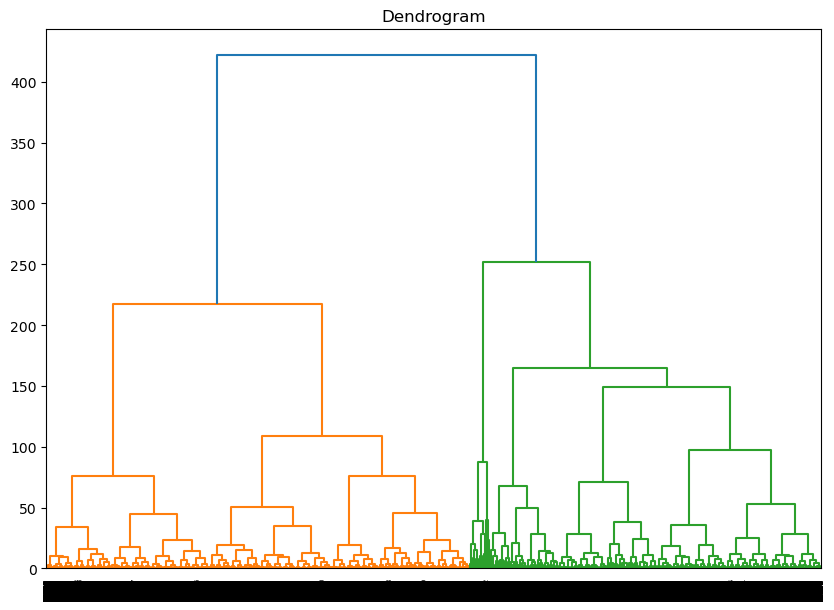

In [17]:
# Create a dendrogram
linked = linkage(df_pca, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Dendrogram')
plt.show()

In [22]:
# hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# fit and predict
cluster_labels = cluster.fit_predict(df_pca)

c:\Users\billy\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [23]:
# adding cluster labels to dataframe
data_clustering['cluster'] = cluster_labels

# Analyze the clusters
for i in data_clustering['cluster'].unique():
    print(f'\nCluster {i}')
    print(data_clustering[data_clustering['cluster'] == i].describe())


Cluster 1
                age  Overall_transaction_count  Recency_days   Tenure_days  \
count  19029.000000               19029.000000  19029.000000  19029.000000   
mean      -0.696904                  -0.451786      0.702994     -0.822235   
std        0.657594                   0.153817      0.962369      0.454859   
min       -1.558737                  -0.575937     -1.022482     -1.076964   
25%       -1.219414                  -0.556921     -0.121651     -1.076964   
50%       -0.880091                  -0.499875      0.829694     -1.076964   
75%       -0.201445                  -0.404797      1.583192     -0.753439   
max        0.477202                   2.371472      2.063074      1.205686   

       Unique_items  cluster  
count  19029.000000  19029.0  
mean      -0.474510      1.0  
std        0.157553      0.0  
min       -0.628314      1.0  
25%       -0.580740      1.0  
50%       -0.533166      1.0  
75%       -0.438018      1.0  
max        1.274646      1.0  

Cluste

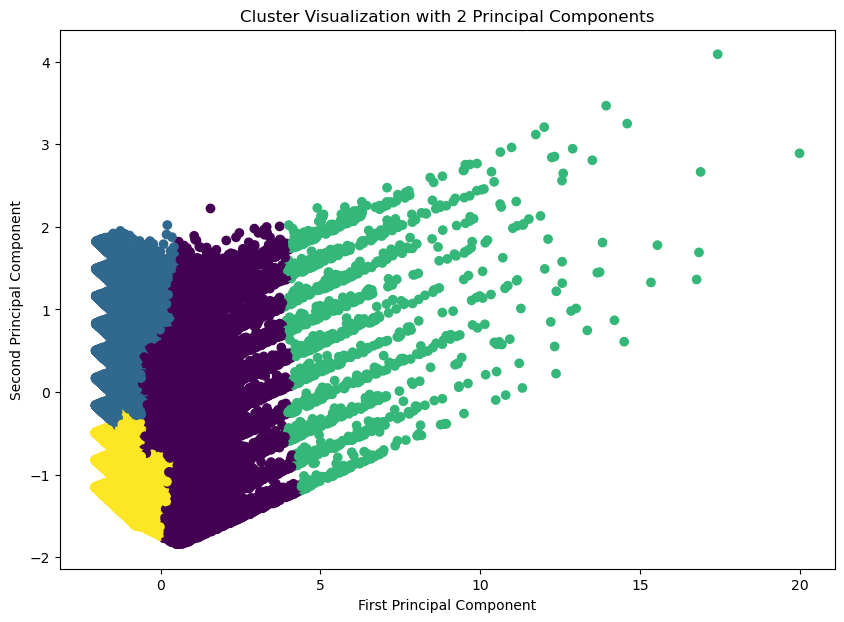

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization with 2 Principal Components')
plt.show()